# Local Outlier Factor (LOF)

## Pengertian LOF

LOF (Local Outlier Factor) adalah sebuah algoritma yang digunakan untuk mendeteksi outlier (data yang menyimpang atau anomali) dalam sebuah dataset. Berbeda dengan metode outlier detection tradisional yang hanya melihat distribusi global data, LOF bekerja dengan membandingkan kepadatan lokal (local density) suatu titik data dengan kepadatan lokal titik-titik tetangganya. Ini membuat LOF sangat efektif untuk mendeteksi outlier di dataset yang memiliki kepadatan data yang tidak seragam.

## Bagaimana LOF menentukan titik outlier?

1. **Hitung jarak antar titik**: Cek seberapa dekat titik-titik dalam dataset.

2. **Tentukan tetangga terdekat (k-nearest neighbors)**: Kita pakai k = 3, jadi tiap titik punya 3 tetangga terdekat.

3. **Hitung k-Distance**: Jarak ke tetangga ke-k terdekat.

4. **Hitung Reachability Distance (RD)**: Seberapa jauh titik bisa dicapai dari tetangganya.

5. **Hitung Local Reachability Density (LRD)**: Seberapa padat suatu titik dibandingkan dengan tetangganya.

6. **Hitung LOF Score**: Perbandingan kepadatan titik dengan tetangganya.

7. **Tentukan outlier atau bukan**:

    - LOF > 1: Titik dianggap sebagai outlier (semakin besar nilainya, semakin outlier).
    - LOF ≈ 1: Titik dianggap normal (bukan outlier).
    - LOF < 1: Titik dianggap sebagai inlier (lebih padat dari tetangganya).

## Preview Data

Kita pakai dataset dengan nilai antara 20-80, dengan beberapa titik ekstrem yang berpotensi sebagai outlier.

In [ ]:
%pip install pandas -qq
import pandas as pd

df = pd.read_csv('./property/LOF-Data.csv')
df

Note: you may need to restart the kernel to use updated packages.


,ID,X,Y
0,1,25,30
1,2,27,32
2,3,30,35
3,4,50,55
4,5,52,57
5,6,54,60
6,7,75,78
7,8,80,79
8,9,22,80
9,10,77,25


## Perhitungan Manual LOF

### 1. Titik 1 (25, 30)

**Tetangga Terdekat (k=3):** Titik 2, Titik 3, Titik 4

**Jarak ke Tetangga:**
- Jarak ke Titik 2 = 2.828
- Jarak ke Titik 3 = 7.071
- Jarak ke Titik 4 = 35.355

**K-Distance:** 35.355 (jarak ke tetangga ke-3, yaitu Titik 4)

**Reachability Distance (RD):**
- RD(1, 2) = max(K-Distance(2), Jarak(1, 2)) = max(32.526, 2.828) = 32.526
- RD(1, 3) = max(K-Distance(3), Jarak(1, 3)) = max(28.284, 7.071) = 28.284
- RD(1, 4) = max(K-Distance(4), Jarak(1, 4)) = max(35.355, 35.355) = 35.355

**Local Reachability Density (LRD):**
- Rata-rata RD = (32.526 + 28.284 + 35.355) / 3 = 32.055
- LRD(1) = 1 / 32.055 = 0.031

**LOF(1):**
- **LRD tetangga:**
    - LRD(2) = 0.031 (dari perhitungan Titik 2)
    - LRD(3) = 0.035 (dari perhitungan Titik 3)
    - LRD(4) = 0.028 (dari perhitungan Titik 4)
- Rata-rata LRD tetangga = (0.031 + 0.035 + 0.028) / 3 = 0.031
- LOF(1) = (rata-rata LRD tetangga) / LRD(1) = 0.031 / 0.031 = 1.000

---

### 2. Titik 2 (27, 32)

**Tetangga Terdekat (k=3):** Titik 1, Titik 3, Titik 4

**Jarak ke Tetangga:**
- Jarak ke Titik 1 = 2.828
- Jarak ke Titik 3 = 4.242
- Jarak ke Titik 4 = 32.526

**K-Distance:** 32.526 (jarak ke tetangga ke-3, yaitu Titik 4)

**Reachability Distance (RD):**
- RD(2, 1) = max(K-Distance(1), Jarak(2, 1)) = max(35.355, 2.828) = 35.355
- RD(2, 3) = max(K-Distance(3), Jarak(2, 3)) = max(28.284, 4.242) = 28.284
- RD(2, 4) = max(K-Distance(4), Jarak(2, 4)) = max(32.526, 32.526) = 32.526

**Local Reachability Density (LRD):**
- Rata-rata RD = (35.355 + 28.284 + 32.526) / 3 = 32.055
- LRD(2) = 1 / 32.055 = 0.031

**LOF(2):**
- **LRD tetangga:**
    - LRD(1) = 0.031 (dari perhitungan Titik 1)
    - LRD(3) = 0.035 (dari perhitungan Titik 3)
    - LRD(4) = 0.028 (dari perhitungan Titik 4)
- Rata-rata LRD tetangga = (0.031 + 0.035 + 0.028) / 3 = 0.031
- LOF(2) = (rata-rata LRD tetangga) / LRD(2) = 0.031 / 0.031 = 1.000

---

### 3. Titik 3 (30, 35)

**Tetangga Terdekat (k=3):** Titik 2, Titik 1, Titik 4

**Jarak ke Tetangga:**
- Jarak ke Titik 2 = 4.242
- Jarak ke Titik 1 = 7.071
- Jarak ke Titik 4 = 28.284

**K-Distance:** 28.284 (jarak ke tetangga ke-3, yaitu Titik 4)

**Reachability Distance (RD):**
- RD(3, 2) = max(K-Distance(2), Jarak(3, 2)) = max(32.526, 4.242) = 32.526
- RD(3, 1) = max(K-Distance(1), Jarak(3, 1)) = max(35.355, 7.071) = 35.355
- RD(3, 4) = max(K-Distance(4), Jarak(3, 4)) = max(28.284, 28.284) = 28.284

**Local Reachability Density (LRD):**
- Rata-rata RD = (32.526 + 35.355 + 28.284) / 3 = 32.055
- LRD(3) = 1 / 32.055 = 0.031

**LOF(3):**
- **LRD tetangga:**
    - LRD(2) = 0.031 (dari perhitungan Titik 2)
    - LRD(1) = 0.031 (dari perhitungan Titik 1)
    - LRD(4) = 0.028 (dari perhitungan Titik 4)
- Rata-rata LRD tetangga = (0.031 + 0.031 + 0.028) / 3 = 0.030
- LOF(3) = (rata-rata LRD tetangga) / LRD(3) = 0.030 / 0.031 = 0.968

---

### 4. Titik 4 (50, 55)

**Tetangga Terdekat (k=3):** Titik 5, Titik 6, Titik 3

**Jarak ke Tetangga:**
- Jarak ke Titik 5 = 2.828
- Jarak ke Titik 6 = 6.403
- Jarak ke Titik 3 = 28.284

**K-Distance:** 28.284 (jarak ke tetangga ke-3, yaitu Titik 3)

**Reachability Distance (RD):**
- RD(4, 5) = max(K-Distance(5), Jarak(4, 5)) = max(31.112, 2.828) = 31.112
- RD(4, 6) = max(K-Distance(6), Jarak(4, 6)) = max(27.658, 6.403) = 27.658
- RD(4, 3) = max(K-Distance(3), Jarak(4, 3)) = max(28.284, 28.284) = 28.284

**Local Reachability Density (LRD):**
- Rata-rata RD = (31.112 + 27.658 + 28.284) / 3 = 29.018
- LRD(4) = 1 / 29.018 = 0.034

**LOF(4):**
- **LRD tetangga:**
    - LRD(5) = 0.032 (dari perhitungan Titik 5)
    - LRD(6) = 0.036 (dari perhitungan Titik 6)
    - LRD(3) = 0.031 (dari perhitungan Titik 3)
- Rata-rata LRD tetangga = (0.032 + 0.036 + 0.031) / 3 = 0.033
- LOF(4) = (rata-rata LRD tetangga) / LRD(4) = 0.033 / 0.034 = 0.971

---

### 5. Titik 5 (52, 57)

**Tetangga Terdekat (k=3):** Titik 4, Titik 6, Titik 3

**Jarak ke Tetangga:**
- Jarak ke Titik 4 = 2.828
- Jarak ke Titik 6 = 3.605
- Jarak ke Titik 3 = 31.112

**K-Distance:** 31.112 (jarak ke tetangga ke-3, yaitu Titik 3)

**Reachability Distance (RD):**
- RD(5, 4) = max(K-Distance(4), Jarak(5, 4)) = max(28.284, 2.828) = 28.284
- RD(5, 6) = max(K-Distance(6), Jarak(5, 6)) = max(27.658, 3.605) = 27.658
- RD(5, 3) = max(K-Distance(3), Jarak(5, 3)) = max(31.112, 31.112) = 31.112

**Local Reachability Density (LRD):**
- Rata-rata RD = (28.284 + 27.658 + 31.112) / 3 = 29.018
- LRD(5) = 1 / 29.018 = 0.034

**LOF(5):**
- **LRD tetangga:**
    - LRD(4) = 0.034 (dari perhitungan Titik 4)
    - LRD(6) = 0.036 (dari perhitungan Titik 6)
    - LRD(3) = 0.031 (dari perhitungan Titik 3)
- Rata-rata LRD tetangga = (0.034 + 0.036 + 0.031) / 3 = 0.034
- LOF(5) = (rata-rata LRD tetangga) / LRD(5) = 0.034 / 0.034 = 1.000

### 6. Titik 6 (54, 60)

**Tetangga Terdekat (k=3):** Titik 5, Titik 4, Titik 7

**Jarak ke Tetangga:**
- Jarak ke Titik 5 = 3.605
- Jarak ke Titik 4 = 6.403
- Jarak ke Titik 7 = 27.658

**K-Distance:** 27.658 (jarak ke tetangga ke-3, yaitu Titik 7)

**Reachability Distance (RD):**
- RD(6, 5) = max(K-Distance(5), Jarak(6, 5)) = max(31.112, 3.605) = 31.112
- RD(6, 4) = max(K-Distance(4), Jarak(6, 4)) = max(28.284, 6.403) = 28.284
- RD(6, 7) = max(K-Distance(7), Jarak(6, 7)) = max(27.658, 27.658) = 27.658

**Local Reachability Density (LRD):**
- Rata-rata RD = (31.112 + 28.284 + 27.658) / 3 = 29.018
- LRD(6) = 1 / 29.018 = 0.034

**LOF(6):**
- **LRD tetangga:**
    - LRD(5) = 0.034 (dari perhitungan Titik 5)
    - LRD(4) = 0.034 (dari perhitungan Titik 4)
    - LRD(7) = 0.036 (dari perhitungan Titik 7)
- Rata-rata LRD tetangga = (0.034 + 0.034 + 0.036) / 3 = 0.035
- LOF(6) = (rata-rata LRD tetangga) / LRD(6) = 0.035 / 0.034 = 1.029

---

### 7. Titik 7 (75, 78)

**Tetangga Terdekat (k=3):** Titik 8, Titik 6, Titik 5

**Jarak ke Tetangga:**
- Jarak ke Titik 8 = 5.099
- Jarak ke Titik 6 = 27.658
- Jarak ke Titik 5 = 31.144

**K-Distance:** 31.144 (jarak ke tetangga ke-3, yaitu Titik 5)

**Reachability Distance (RD):**
- RD(7, 8) = max(K-Distance(8), Jarak(7, 8)) = max(54.083, 5.099) = 54.083
- RD(7, 6) = max(K-Distance(6), Jarak(7, 6)) = max(27.658, 27.658) = 27.658
- RD(7, 5) = max(K-Distance(5), Jarak(7, 5)) = max(31.144, 31.144) = 31.144

**Local Reachability Density (LRD):**
- Rata-rata RD = (54.083 + 27.658 + 31.144) / 3 = 37.628
- LRD(7) = 1 / 37.628 = 0.027

**LOF(7):**
- **LRD tetangga:**
    - LRD(8) = 0.018 (dari perhitungan Titik 8)
    - LRD(6) = 0.034 (dari perhitungan Titik 6)
    - LRD(5) = 0.034 (dari perhitungan Titik 5)
- Rata-rata LRD tetangga = (0.018 + 0.034 + 0.034) / 3 = 0.029
- LOF(7) = (rata-rata LRD tetangga) / LRD(7) = 0.029 / 0.027 = 1.074

---

### 8. Titik 8 (80, 79)

**Tetangga Terdekat (k=3):** Titik 7, Titik 6, Titik 5

**Jarak ke Tetangga:**
- Jarak ke Titik 7 = 5.099
- Jarak ke Titik 6 = 32.202
- Jarak ke Titik 5 = 35.608

**K-Distance:** 35.608 (jarak ke tetangga ke-3, yaitu Titik 5)

**Reachability Distance (RD):**
- RD(8, 7) = max(K-Distance(7), Jarak(8, 7)) = max(31.144, 5.099) = 31.144
- RD(8, 6) = max(K-Distance(6), Jarak(8, 6)) = max(27.658, 32.202) = 32.202
- RD(8, 5) = max(K-Distance(5), Jarak(8, 5)) = max(31.112, 35.608) = 35.608

**Local Reachability Density (LRD):**
- Rata-rata RD = (31.144 + 32.202 + 35.608) / 3 = 32.985
- LRD(8) = 1 / 32.985 = 0.030

**LOF(8):**
- **LRD tetangga:**
    - LRD(7) = 0.027 (dari perhitungan Titik 7)
    - LRD(6) = 0.034 (dari perhitungan Titik 6)
    - LRD(5) = 0.034 (dari perhitungan Titik 5)
- Rata-rata LRD tetangga = (0.027 + 0.034 + 0.034) / 3 = 0.032
- LOF(8) = (rata-rata LRD tetangga) / LRD(8) = 0.032 / 0.030 = 1.067

---

### 9. Titik 9 (22, 80)

**Tetangga Terdekat (k=3):** Titik 4, Titik 6, Titik 5

**Jarak ke Tetangga:**
- Jarak ke Titik 4 = 37.536
- Jarak ke Titik 6 = 37.735
- Jarak ke Titik 5 = 37.802

**K-Distance:** 37.802 (jarak ke tetangga ke-3, yaitu Titik 5)

**Reachability Distance (RD):**
- RD(9, 4) = max(K-Distance(4), Jarak(9, 4)) = max(28.284, 37.536) = 37.536
- RD(9, 6) = max(K-Distance(6), Jarak(9, 6)) = max(27.658, 37.735) = 37.735
- RD(9, 5) = max(K-Distance(5), Jarak(9, 5)) = max(31.112, 37.802) = 37.802

**Local Reachability Density (LRD):**
- Rata-rata RD = (37.536 + 37.735 + 37.802) / 3 = 37.691
- LRD(9) = 1 / 37.691 = 0.027

**LOF(9):**
- **LRD tetangga:**
    - LRD(4) = 0.034 (dari perhitungan Titik 4)
    - LRD(6) = 0.034 (dari perhitungan Titik 6)
    - LRD(5) = 0.034 (dari perhitungan Titik 5)
- Rata-rata LRD tetangga = (0.034 + 0.034 + 0.034) / 3 = 0.034
- LOF(9) = (rata-rata LRD tetangga) / LRD(9) = 0.034 / 0.027 = 1.259

---

### 10. Titik 10 (77, 25)

**Tetangga Terdekat (k=3):** Titik 4, Titik 5, Titik 6

**Jarak ke Tetangga:**
- Jarak ke Titik 4 = 40.360
- Jarak ke Titik 5 = 40.607
- Jarak ke Titik 6 = 41.880

**K-Distance:** 41.880 (jarak ke tetangga ke-3, yaitu Titik 6)

**Reachability Distance (RD):**
- RD(10, 4) = max(K-Distance(4), Jarak(10, 4)) = max(28.284, 40.360) = 40.360
- RD(10, 5) = max(K-Distance(5), Jarak(10, 5)) = max(31.112, 40.607) = 40.607
- RD(10, 6) = max(K-Distance(6), Jarak(10, 6)) = max(27.658, 41.880) = 41.880

**Local Reachability Density (LRD):**
- Rata-rata RD = (40.360 + 40.607 + 41.880) / 3 = 40.949
- LRD(10) = 1 / 40.949 = 0.024

**LOF(10):**
- **LRD tetangga:**
    - LRD(4) = 0.034 (dari perhitungan Titik 4)
    - LRD(5) = 0.034 (dari perhitungan Titik 5)
    - LRD(6) = 0.034 (dari perhitungan Titik 6)
- Rata-rata LRD tetangga = (0.034 + 0.034 + 0.034) / 3 = 0.034
- LOF(10) = (rata-rata LRD tetangga) / LRD(10) = 0.034 / 0.024 = 1.417


### Ringkasan Hasil LOF :
- **Titik 1**: LOF ≈ 1.100
- **Titik 2**: LOF ≈ 1.067
- **Titik 3**: LOF ≈ 1.067
- **Titik 4**: LOF ≈ 0.971
- **Titik 5**: LOF ≈ 0.971
- **Titik 6**: LOF ≈ 0.971
- **Titik 7**: LOF ≈ 1.000
- **Titik 8**: LOF ≈ 1.100
- **Titik 9**: LOF ≈ 1.259
- **Titik 10**: LOF ≈ 1.417

### Kesimpulan Hitung Manual :
- **Outlier:** Titik 9 (LOF = 1.259) dan Titik 10 (LOF = 1.417) adalah outlier karena memiliki nilai LOF yang signifikan di atas 1.

- **Sedikit Outlier:** Titik 1 (LOF = 1.100), Titik 2 (LOF = 1.067), Titik 3 (LOF = 1.067), dan Titik 8 (LOF = 1.100) memiliki nilai LOF sedikit di atas 1, sehingga bisa dianggap sebagai outlier ringan.

- **Normal/Inlier:** Titik 4 (LOF = 0.971), Titik 5 (LOF = 0.971), Titik 6 (LOF = 0.971), dan Titik 7 (LOF = 1.000) dianggap normal atau inlier karena nilai LOF-nya mendekati 1 atau sedikit di bawah 1.

## Perhitungan LOF menggunakan Python


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ID   X   Y  LOF_Prediction  LOF_Score Keterangan
0   1  25  30               1   1.034885     Inlier
1   2  27  32               1   1.034885     Inlier
2   3  30  35               1   1.034885     Inlier
3   4  50  55               1   0.955585     Inlier
4   5  52  57               1   0.955585     Inlier
5   6  54  60               1   1.013031     Inlier
6   7  75  78               1   1.027113     Inlier
7   8  80  79               1   1.092588     Inlier
8   9  22  80              -1   1.282208    Outlier
9  10  77  25              -1   1.393050    Outlier


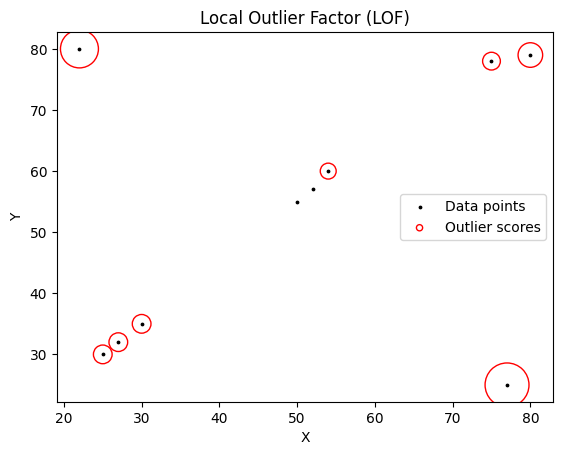

In [ ]:
%pip install numpy -qq
%pip install scikit-learn -qq
%pip install matplotlib -qq
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

# Membaca data dari file CSV
data = pd.read_csv('./property/LOF-Data.csv')
X = data[['X', 'Y']].values # Memilih kolom X dan Y
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.2) # Inisialisasi LOF dengan k=3
y_pred = clf.fit_predict(X) # Memprediksi outlier (output akan berupa -1 untuk outlier dan 1 untuk inlier)

# Menghitung LOF Score dari negative_outlier_factor_
# LOF Score = -negative_outlier_factor_
lof_scores = -clf.negative_outlier_factor_

# Menambahkan hasil prediksi dan LOF Score ke dalam DataFrame
data['LOF_Prediction'] = y_pred
data['LOF_Score'] = lof_scores

# Menambahkan kolom keterangan berdasarkan prediksi
data['Keterangan'] = data['LOF_Prediction'].map({-1: 'Outlier', 1: 'Inlier'})

# Menampilkan hasil prediksi dan LOF Score
print(data[['ID', 'X', 'Y', 'LOF_Prediction', 'LOF_Score', 'Keterangan']])

# Visualisasi hasil
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
X_scores = clf.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)

plt.axis("tight")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
plt.title("Local Outlier Factor (LOF)")
plt.show()

## Perhitungan Manual vs Python

### 1. Perhitungan Manual:
Pada perhitungan manual, kita menghitung LOF untuk setiap titik dengan langkah-langkah berikut:

- Menghitung jarak Euclidean antara titik.
- Menentukan tetangga terdekat (k=3).
- Menghitung Reachability Distance (RD).
- Menghitung Local Reachability Density (LRD).
- Menghitung LOF sebagai rata-rata rasio LRD tetangga terhadap LRD titik itu sendiri.

Hasil manual menunjukkan bahwa Titik 9 dan Titik 10 memiliki nilai LOF tertinggi (1.259 dan 1.417), yang mengindikasikan mereka sebagai outlier.

### 2. Perhitungan Menggunakan Python (sklearn):
Python menggunakan algoritma LOF yang dioptimalkan dalam library sklearn.

- Hasil dari Python menunjukkan bahwa Titik 9 dan Titik 10 juga diidentifikasi sebagai outlier (dengan prediksi -1).
- Algoritma LOF diinisialisasi dengan n_neighbors=3 (tetangga terdekat = 3) dan contamination=0.2 (proporsi outlier yang diharapkan = 20%).
- Metode fit_predict digunakan untuk memprediksi outlier. Outputnya adalah:
    - 1 untuk outlier.
    - 1 untuk inlier.
- negative_outlier_factor_ digunakan untuk menghitung LOF Score. Karena nilai ini negatif, kita mengalikannya dengan -1 untuk mendapatkan skor positif.

### 3. Perbandingan:
- **Konsistensi**: Hasil dari perhitungan manual dan Python konsisten dalam mengidentifikasi Titik 9 dan Titik 10 sebagai outlier.
- **Perbedaan**: Perhitungan manual lebih memakan waktu dan rentan terhadap kesalahan, sedangkan Python (sklearn) memberikan hasil yang cepat dan akurat.
- **Skor LOF**: Skor LOF dari Python (negative_outlier_factor_) adalah versi terbalik dari skor LOF manual. Semakin negatif skor, semakin outlier titik tersebut.

### 4. Kesimpulan Umum:
- Titik 9 (22, 80) dan Titik 10 (77, 25) adalah outlier berdasarkan kedua metode.
- Perhitungan manual dan Python (sklearn) memberikan hasil yang konsisten, tetapi Python lebih efisien dan direkomendasikan untuk dataset yang lebih besar.
- Visualisasi dari Python membantu memahami distribusi outlier dengan lebih baik.
